In [1]:
import tensorflow as tf

In [2]:
from utils import model_info, plot_history, load_data

X_train, y_train, X_val, y_val, X_test, y_test = load_data()

In [3]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

In [17]:
base_model = tf.keras.models.load_model('./models/simple_cnn.h5')

aug_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    data_augmentation,
    base_model    
], name='aug_model')

In [20]:
model_info(aug_model)

Model: "aug_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         0         
                                                                 
 simple_cnn (Sequential)     (None, 10)                93322     
                                                                 
Total params: 93,322
Trainable params: 93,322
Non-trainable params: 0
_________________________________________________________________


In [19]:
aug_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = aug_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/30
1350/1350 [==============================] - 21s 15ms/step - loss: 0.6771 - accuracy: 0.7627 - val_loss: 0.4605 - val_accuracy: 0.8494
Epoch 2/30
1350/1350 [==============================] - 23s 17ms/step - loss: 0.4851 - accuracy: 0.8239 - val_loss: 0.4040 - val_accuracy: 0.8692
Epoch 3/30
1350/1350 [==============================] - 21s 16ms/step - loss: 0.4472 - accuracy: 0.8359 - val_loss: 0.3817 - val_accuracy: 0.8686
Epoch 4/30
1350/1350 [==============================] - 19s 14ms/step - loss: 0.4227 - accuracy: 0.8480 - val_loss: 0.4042 - val_accuracy: 0.8589
Epoch 5/30
1350/1350 [==============================] - 20s 15ms/step - loss: 0.4083 - accuracy: 0.8501 - val_loss: 0.3875 - val_accuracy: 0.8713
Epoch 6/30
1350/1350 [==============================] - 20s 15ms/step - loss: 0.3919 - accuracy: 0.8558 - val_loss: 0.3874 - val_accuracy: 0.8629
Epoch 7/30
1350/1350 [==============================] - 20s 15ms/step - loss: 0.3809 - accuracy: 0.8584 - val_loss: 0.3608 -

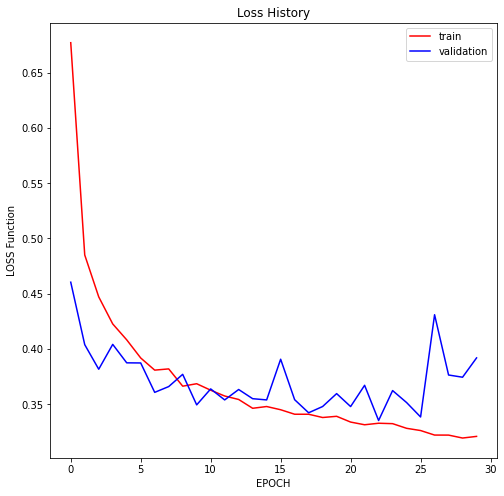

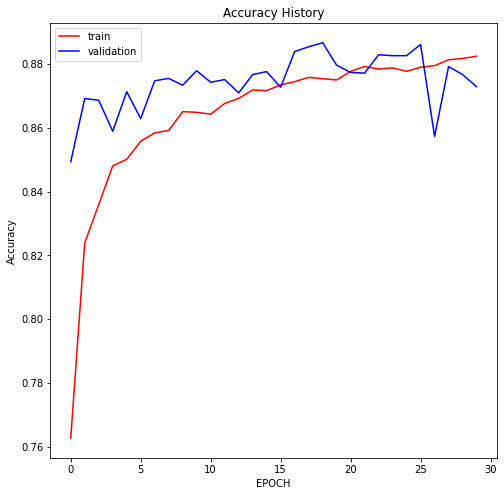

In [22]:
plot_history(history)

In [23]:
aug_model.evaluate(X_test, y_test)

188/188 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8692


[0.41040340065956116, 0.8691666722297668]

In [24]:
aug_model.save('models/cnn_with_aug.h5')